# <center>Integrating Synthetic Aperature Radar Imagery in Landslide Detection</center>

 <table><tr><td>By Leah Manak and Mitchell Thompson</td></tr></table>
 <table><tr><td>Special Credit to Elsa Culler</td></tr></table>
  <table><tr><td>June, 2022</td></tr></table>

## <center>Project Goals</center>
   This project is built upon a previously developed low-accuracy large spatial scale landslide database provided by the Earth Lab at the University of Colorado Boulder. This database helped serve as a reference for analyzing the accuracy of Synthetic Aperture Radar (SAR) imagery to detect multi-temporal changes in the Earth's surface due to landslides. The verified landslide database was used for location markers that were referenced when collecting SAR images. The verified locations are depicted in the map below. The SAR images were processed and statistically tested for indicators of change that occurred around the time of the landslide. For each landslide, we aimed to create an algorithm that can collect a series of satellite images, process through the images to indicate where and when the land-change occurred by analyzing the pixels in each image, and then produce an interactive map that shows an accurate depiction of the changes that occurred.

### <center>Area of Interest Map: Verified North American Landslides</center>

![locations.jpg](https://github.com/mthomp89/landslide-detect/blob/main/doc/locations.jpg)

## <center>Background</center>

   Severe precipitation events and wildland fires are major drivers of landslides, and they are expected to become more prevalent and severe with a changing climate [1]. Landslides continue to be a risk for many populations due to the rapid destruction that they yield to infrastructure and surrounding environments. There is currently a push to improve landslide visibility on a large spatial scale to better assess verified landslide sites and to also improve early warning systems that can help alleviate the potential destruction in areas of high risk [2]. Collecting landslide data on a large spatial scale is tedious and can also be rendered incomplete due to a bias toward collecting data near populated areas [3]. 
   ![link to big sur](https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/thumbnails/image/BigSur1_May20SlideDES_0.jpg)

## <center>Synthetic Aperture Radar</center>

Synthetic Aperture Radar, or SAR is of remote sensing whereby a sensor generates and places its own energy on the distant target. This same energy is reflected to the co-located antenna of the sensor which records the amount of that energy after interacting with the Earth. This is also sometimes referred to as active sensing. Environmental monitoring and land use mapping often require broad-area imaging at high resolutions, particularly when the necessity of imaging involves extremely rural areas. Often, this data must be acquired at night or during inclement weather and SAR provides such a capability. What makes the system synthetic is the electronically controlled sequence of acquisitions from a shorter antenna which are combined to simulate a much larger antenna. Among all remote sensing technologies, SAR sensors utilize the longer wavelengths of the electromagnetic spectrum which provides unique properties such as the ability to see through atmospheric disruptions such as clouds and smog. The signal wavelength of a SAR system determines how the signal interacts with a surface as well as the depth of penetration into or through the surface. 

Additionally, SAR signals can be transmitted different polarizations. Polarization refers to the orientation of the plane at which the radio waves “wiggle” or oscillate. In today’s modern SAR systems, the polarized orientation can occur at any angle but are best employed in linear methods such as horizontal or vertical in relation to the intended target surface area. The horizontal polarization is indicated by the capital letter H, and the vertical polarization is indicated by capital letter V. The radio frequency signal polarization can be electronically controlled to transmit and receive independent of the other. For example, signals emitted in vertical (V) and received in horizontal (H) polarization would be indicated by a VH. Conversely, signals that are emitted horizontally (H) and received horizontally (H) would be indicated by HH. Rough surface scattering, such as that caused by bare soil or water, is most sensitive to VV signal scattering.
Disadvantages of SAR remote sensing are typically binned into three categories: data is much different than passive sensing, also known as optical, and very difficult to interpret, every dataset involves sensor noise or speckle which induces “graininess” into the image, and topographic elements such as elevation change cause shadows and a phenomenon called “layover”. 

## <center>Sentinal-1 Synthetic Aperture Radar Imagery</center>
![Sentinal-1](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSnEbm9fwTfAgz9UTlwD8_CD59LawTUhN2maA&usqp=CAU)
 
SENTINEL-1 is an imaging radar mission providing continuous all-weather, day-and-night imagery at C-band. The SENTINEL-1 constellation provides high reliability, improved revisit time, geographical coverage and rapid data dissemination to support operational applications in the priority areas of marine monitoring, land monitoring and emergency services [4]. The system includes four electronically controlled imaging modes with different resolutions and imaging swaths. It also provides the dual polarization capability of transmitting and receiving in all four modes (HH, VV, VH, HV). The combination of  dual polarization and wide imaging swaths makes the system quite unique to handle change detection on a broad scale. 

In this notebook we utilize the [COPERNICUS/S1_GRD_FLOAT](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S1_GRD#bands) Earth Engine image collection. 

## <center>Analysis</center>
We sought to know: when and where changes have taken place. In order to do this, we  highlighted statistically significant changes through a series of "tests for change". We gathered in-depth statistical analyses from Earth Engine Python tutorials found [here](https://developers.google.com/earth-engine/tutorials/community/detecting-changes-in-sentinel-1-imagery-pt-1), with an emphasis on the statistical changes outlined in [Part 3](https://developers.google.com/earth-engine/tutorials/community/detecting-changes-in-sentinel-1-imagery-pt-3) by by Dr. Mort Canty (Canty, 2019). Moreover, this initial analysis also required the utilization of Google Earth Engine's Basemap layers titled: "USGS NAIP Imagery NDVI" and the 'USGS NAIP Imagery False Color'. The purpose of these image layers is to better see what the landscape looks like so the user could search for "markings" from landslides on the initial maps to see if they can spot a landslide. 

![splitmap.gif](https://github.com/mthomp89/landslide-detect/blob/main/doc/splitmap.gif)

In order to accurately detect land-change due to landslides, we needed to gather information across a time series (k) to determine the changes that occurred as well as acquiring the accurate location information for the landslides, within the bounds of sensor resolution. Statistical tests included pre-calculated _P_ values in _pv\_arr_ (shown schematically in Table 1.1 for $k=5$) are then scanned in nested iterations over indices $i$ and $j$ to determine the following thematic change maps:

- cmap: the interval of the most recent change, one band, byte values $\in [0,k-1]$,
- smap: the interval of the first change, one band, byte values $\in [0,k-1]$,
- fmap: the number of changes, one band, byte values $\in [0,k-1]$,
- bmap: the changes in each interval, $\ k-1$ bands, byte values $\in [0,1]$).

|Table 1.1 |       |       |       |       |       |        |
|----------|-------|-------|-------|-------|-------|--------|
|$i\ $ / $j$|      |     1 |     2 |     3 |     4 |        |
| 1        |       | $P_2$ | $P_3$ | $P_4$ | $P_5$ | $P_{Q5}$  |
| 2        |       |       | $P_2$ | $P_3$ | $P_4$ | $P_{Q4}$  |
| 3        |       |       |       | $P_2$ | $P_3$ | $P_{Q3}$  |
| 4        |       |       |       |       | $P_2$ | $P_{Q2}$  |

A boolean variable _median_ is included in the code. Its purpose is to reduce the speckle effect in no-change regions, which is at least partly a consequence of the uniform distribution of the _P_ values under $H_0$ (see the section [A note on P values](https://developers.google.com/earth-engine/tutorials/community/detecting-changes-in-sentinel-1-imagery-pt-2#a_note_on_p_values) in Part 2). If _median_ is _True_, the _P_ values for each $Q_\ell$ statistic are passed through a $5\times 5$ median filter before being compared with the significance threshold. This is not statistically kosher but probably justifiable if one is only interested in large homogeneous changes, for example flood inundations or deforestation.

Once ran through our statistical tests, the definite (cyan or light blue) color layers correspond to decreases and increases in intensity of reflectances that the satellite images picked up over a time increment. This blue color change indicates displaced surface on Earth, and in our case a landslide. Our initial tests produced the aforementioned changemap (like the one below) that showed the definite changes over all SAR images 180 days before and 180 days after a landslide event. Our final product is one map of a compilation of four different change maps. Each respective change map represents the result of testing definite change in pixels at different intervals across the SAR images associate with a landslide. This process can be done with all of the landslides identified in our database. 

![change.jpg](https://github.com/mthomp89/landslide-detect/blob/main/doc/change.jpg)

## <center>Findings</center>
When we ran our test, correlation in certain landslide areas seems to be prominent. One location in particular (slide I.D. # 9734, image below) is an area that our change detection map showed a prominent visual correlation.  
![bigsur.jpg](https://github.com/mthomp89/landslide-detect/blob/main/doc/bigsur.jpg)

We could see a correlation with slide I.D. # 10588 (image below). The banks around the river clearly show displaced land, and we could see that our final map showed definite changes that correlated with this displacement. 
![banks.jpg](https://github.com/mthomp89/landslide-detect/blob/main/doc/banks.jpg)


While small, slide I.D. # 10532 (image below) also showed a distinct definite pattern of change with a block of cyan color. This did correlate with our landslide database, and also did match the SATELLITE image basemap.
![smallslide.jpg](https://github.com/mthomp89/landslide-detect/blob/main/doc/smallslide.jpg)


Slide I.D. # 10221 is a prominent landslide visual on the initial AOI SATELLITE image basemap, and also a prominent visual on the initial changes map, however on the final figure, the change did not show. This is possibly an error in the slide image date match for the landslide event. 

![noshowfinal.jpg](https://github.com/mthomp89/landslide-detect/blob/main/doc/noshowfinal.jpg)
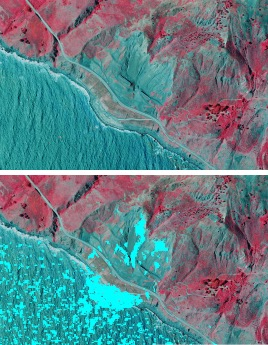

##  <center>Discussion</center>
Our analysis of leveraging the verified landslide database as a reference for detecting landslides with SAR imagery has proven to be worthwhile. As we can tell, areas of definite change do correspond to some locations identified on our verified landslide catalog. Other areas were harder to detect, and the final image did not show clear changes.

Moreover there are possibly errors due to our AOI bounds parameters. We chose close to a 1km boundary for each verified location point, and it is possible that some of these locations are not an exact coordinate. The database does say how accurate the location is, and there are many landslides within a 5km or more boundary. This could be fixed in the future with a bigger aoi boundary, or finding specific locations for landslides.

Other observations include:
- Areas either near urban sites, water, or cropland might throw off our statistical output. These areas are subject to change and might create more noise in our images. We suggest including a water mask to reduce noise of waves. 
- Events like flooding and mudslides might cause change in landscape over a longer period of time. This might diffuse the clarity of our final change map because the event did not technically occur rapidly.
- It would be helpful to include Sentinel-2 Landsat images in this analysis as well. If you used a satellite image that correlates with the same timestamp as the SAR imagery, then the overlapping images might show a more consistent change. The Earth Engine SATELLITE basemap is recent and might have restored infrastructure, cleaned up river banks, and new vegetation.

We hope that our analysis can help provide insights on how landslide detection can be made more efficient with the use of SAR imagery and Google Earth Engine. Open sourced resources such as these are crucial in the advancement of earth observation science, and we are excited to see our findings suggest that landslide detection is possible with SAR. There is a future with machine learning and rapid detection, and these tools can aid in the alleviation of economic and ecological stresses that landslides yield. 

##  <center>Source Material and References</center>
[Link To our GitHub Repository](https://github.com/mthomp89/landslide-detect)
- [1]: Field, C.B.; Barros, V.; Stocker, T.F.; Dahe, Q. Managing the Risks of Extreme Events and Disasters to Advance Climate Change Adaptation: Special Report of the Intergovernmental Panel on Climate Change; Cambridge University Press: Cambridge, UK, 2012.
- [2]: Lindsay, E.; Frauenfelder, R.; Rüther, D.; Nava, L.; Rubensdotter, L.; Strout, J.; Nordal, S. Multi-Temporal Satellite Image Composites in Google Earth Engine for Improved Landslide Visibility: A Case Study of a Glacial Landscape. Remote Sens. 2022, 14, 2301.
- [3]: Kirschbaum, D.B.; Adler, R.; Hong, Y.; Hill, S.; Lerner-Lam, A. A global landslide catalog for hazard applications: Method, results, and limitations. Nat. Hazards 2010, 52, 561–575
- [4] < https://sentinel.esa.int/web/sentinel/user-guides/sentinel-1-sar/>